In [ ]:
from suspension import Suspension
from vehicle import Vehicle
from aerodynamics import Aerodynamics
import math as deez_nuts
from scipy.optimize import fsolve as josie_solver
import residual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



suspension = Suspension()
aero = Aerodynamics()
vehicle = Vehicle(suspension, aero)
specific_residual_func = lambda x: residual.DOF6_motion_residuals(x, vehicle)

# initial_guess (outputs) = ride_height, x_double_dot, y_double_dot, yaw_acceleration, roll, pitch
initial_guess = [0.0761, 0, 0, 0, 0, 0]

data = []
for x_dot in np.linspace(0,20,10):
    for body_slip in np.linspace(0, 0.2, 10):
        for steered_angle in np.linspace(0, 2.2, 10):
            for yaw_rate in np.linspace(0, 0.5, 10):
                vehicle.state.body_slip = body_slip
                vehicle.state.steered_angle = steered_angle
                vehicle.state.x_dot = x_dot
                vehicle.state.yaw_rate = yaw_rate

                output_states = josie_solver(specific_residual_func, initial_guess)
                data.append([x_dot, body_slip, steered_angle, yaw_rate, *output_states])

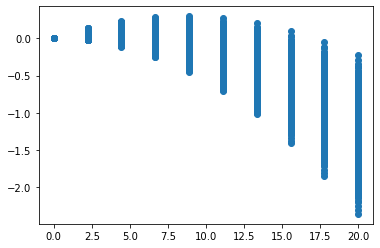

In [23]:
columns = ["x_dot", "body_slip", "steered_angle", "yaw_rate",
                             "ride_height", "x_double_dot", "y_double_dot", "yaw_acceleration", "roll", "pitch"]

df = pd.DataFrame(data, columns = columns)
df.to_csv("MMM.csv")
plt.scatter(df["x_dot"], df["x_double_dot"])
#df.head
